In [81]:
import pandas as pd
import numpy as np


In [82]:
data = pd.read_csv('WineQT.csv')

In [83]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [84]:
data['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [86]:
data.isnull().value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  quality  Id   
False          False             False        False           False      False                False                 False    False  False      False    False    False    1143
Name: count, dtype: int64

In [87]:
data.drop('Id',axis=1,inplace=True)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


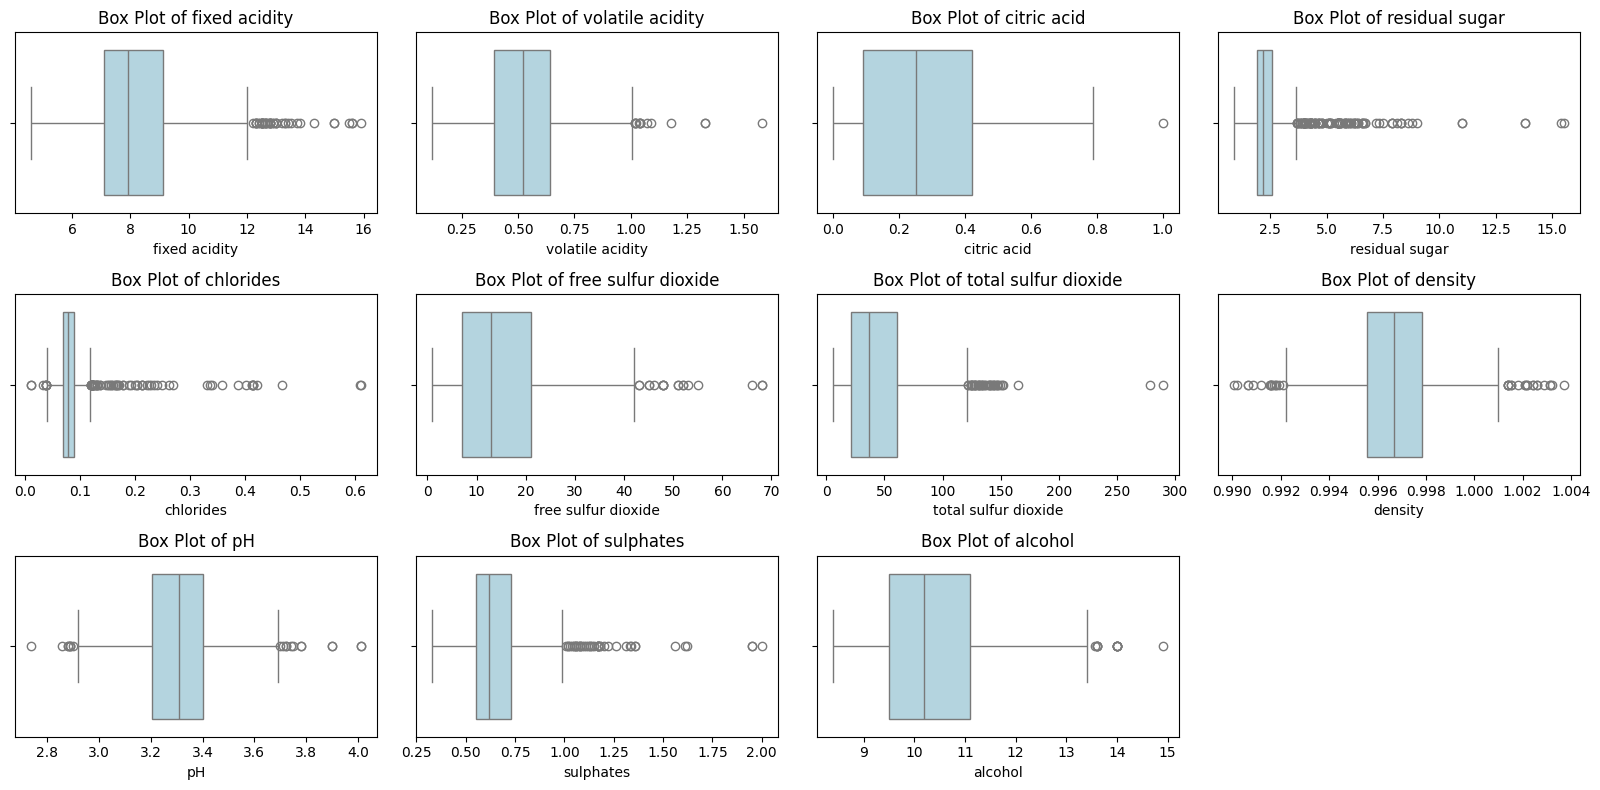

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
for i, col in enumerate(data.columns[:-1]):  
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=col, data=data, color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


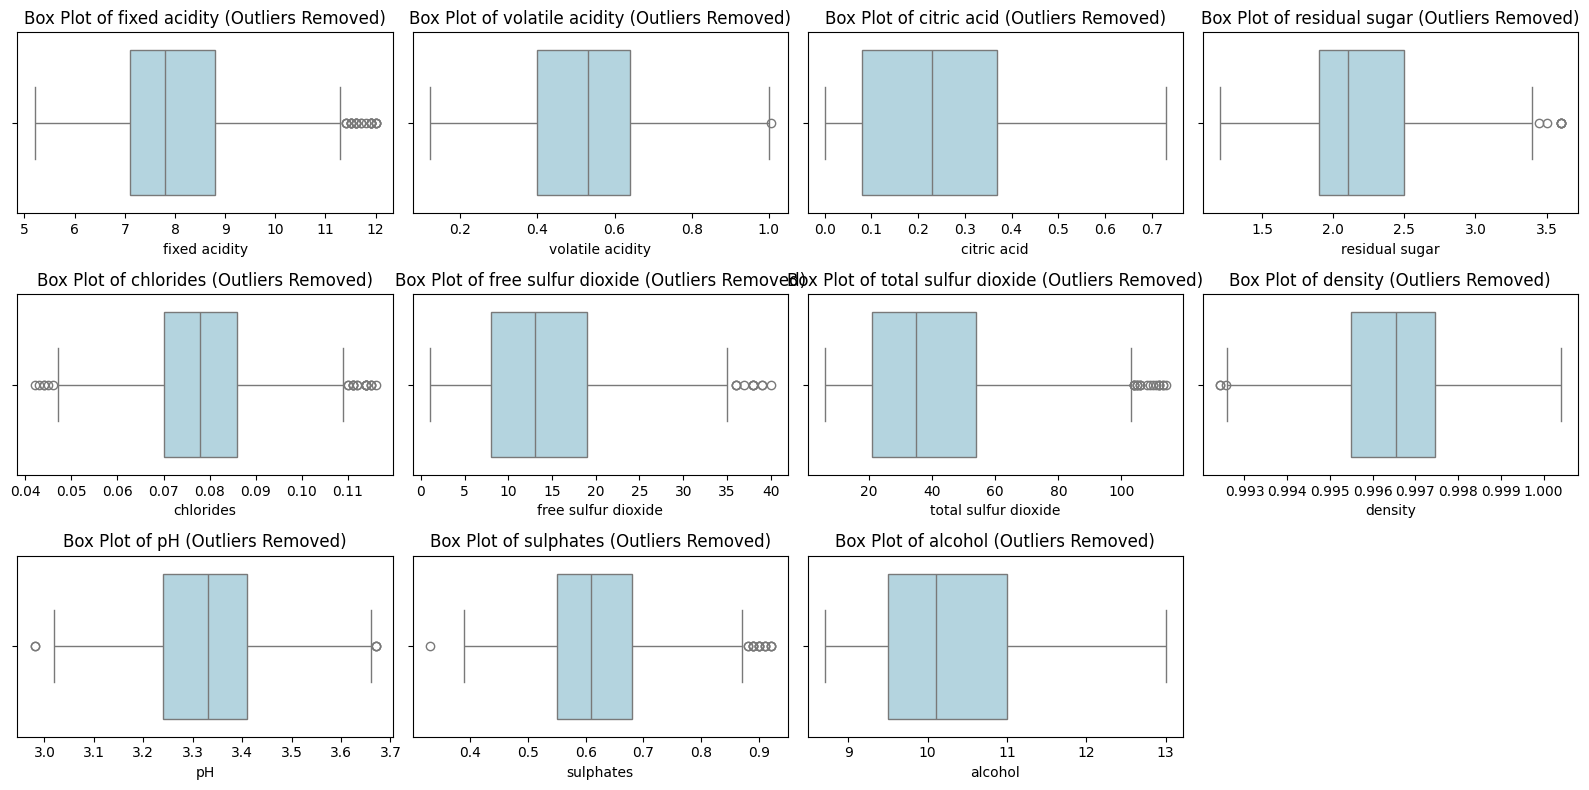

In [90]:
# IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


attributes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for attribute in attributes:
    data = remove_outliers_iqr(data, attribute)

# Visualize box plots after outlier removal
plt.figure(figsize=(16, 8))
for i, col in enumerate(data.columns[:-1]): 
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=col, data=data, color='lightblue')
    plt.title(f'Box Plot of {col} (Outliers Removed)')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


In [91]:
# Correlation Matrix
corr_matrix = data.corr()
correlation_with_quality = corr_matrix['quality'].sort_values(ascending=False)

print(correlation_with_quality)

quality                 1.000000
alcohol                 0.503165
sulphates               0.443144
citric acid             0.264726
fixed acidity           0.139166
residual sugar          0.028237
free sulfur dioxide    -0.013432
pH                     -0.080344
chlorides              -0.169706
density                -0.198820
total sulfur dioxide   -0.200220
volatile acidity       -0.378748
Name: quality, dtype: float64


In [92]:
x= data[attributes]
y=data['quality']

In [93]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=48)
X_resampled, y_resampled = oversampler.fit_resample(x, y)


In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=48)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define and train the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
    
}

results = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    }

# Print the evaluation results for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print()


Model: Logistic Regression
Accuracy: 0.61
Precision: 0.37
Recall: 0.24

Model: Decision Tree Classifier
Accuracy: 0.58
Precision: 0.33
Recall: 0.40

Model: Support Vector Classifier
Accuracy: 0.46
Precision: 0.17
Recall: 0.18

Model: K-Nearest Neighbors
Accuracy: 0.50
Precision: 0.22
Recall: 0.20



c:\Users\MEGHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MEGHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MEGHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

In [96]:
# y_train_array = y_train.to_numpy()

# num_classes = len(pd.unique(y_train_array))
# print("Number of unique classes:", num_classes)


# xgb_classifier = xgb.XGBClassifier(
#     objective='multi:softmax',  # For multi-class classification
#     num_class=num_classes,              # Number of classes (wine quality ratings)
#     max_depth=3,               # Maximum depth of each tree
#     learning_rate=0.1,         # Learning rate
#     n_estimators=100           # Number of boosting rounds
# )

# xgb_classifier.fit(x_train, y_train_array)

# # Make predictions on the test set
# y_pred = xgb_classifier.predict(x_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='macro')
# recall = recall_score(y_test, y_pred, average='macro')

# # Print evaluation metrics
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")


In [97]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

lgb_classifier = lgb.LGBMClassifier(
    objective='multiclass', 
    num_class=10,            
    max_depth=3,        
    learning_rate=0.1, 
    n_estimators=100   
)

# Train the LightGBM classifier
lgb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lgb_classifier.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 557, number of used features: 11
[LightGBM] [Info] Start training from score -6.322565
[LightGBM] [Info] Start training from score -3.757616
[LightGBM] [Info] Start training from score -0.846102
[LightGBM] [Info] Start training from score -0.850295
[LightGBM] [Info] Start training from score -2.228221
[LightGBM] [Info] Start training from score -4.530806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\MEGHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
